# Metrics and Classification Evaluation

Topics covered:

1. Confusion Matrices
1. Various Metrics
1. Classification Report
1. Visualizations

## Confusion Matrix

A confusion matrix aids in the understanding of how a classifier performs.

A binary classifier can have four classification results: true positive (TP), true negative (TN), false positive (FP), and false negatives (FN). *The first two are correct classifications*

### Example

Assuming positive means pregnant and negative is not pregnant; a false positive is like claming a man is pregnant. A false negative is claming that a pregnant woman is not (when she is clearly showing). These two types of errors are referred to as *type 1* and *type 2* errors, respectively

| Actual          	| Predicted negative      	| Predicted positive      	|
|-----------------	|-------------------------	|-------------------------	|
| Actual negative 	| True negative           	| False positive (type 1) 	|
| Actual positive 	| False negative (type 2) 	| True positive           	|

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [11]:
X_train = pd.read_csv('data/titanic_X_train.csv')
X_test = pd.read_csv('data/titanic_X_test.csv')
y_train = pd.read_csv('data/titanic_y_train.csv')['survived']
y_test = pd.read_csv('data/titanic_y_test.csv')['survived']
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [12]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

In [13]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8142493638676844

In [14]:
dt.predict(X.iloc[[0]])

array([0])

In [15]:
dt.predict_proba(X.iloc[[0]])

array([[0.87954545, 0.12045455]])

In [17]:
y_predict = dt.predict(X_test)

In [18]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ["Predict Died","Predict Survived"],
    index = ["True Death", "True Survive"]
)

,Predict Died,Predict Survived
True Death,199,25
True Survive,48,121


In [19]:
from yellowbrick.classifier import ConfusionMatrix

/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


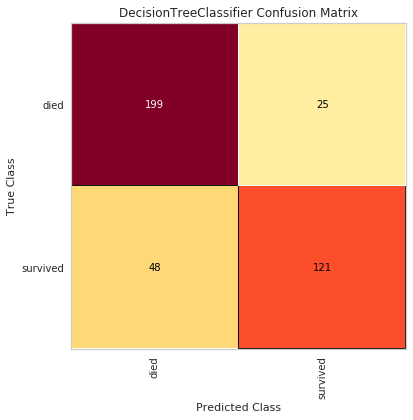

In [22]:
mapping = {0:"died",1:"survived"}
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(dt,classes=["died","survived"],
                        label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof()

## Metrics

The `sklearn.metrics` module implements many common classification metrics, including:

- `accuracy` Percent of correct predictions
- `average_precision` Percision recall curve summary
- `f1` Harmonic mean of percisions and recall
- `neg_log_loss` Logistic or cross-entropy loss
- `precision` Ability to find only relevant samples
- `recall` Ability to find all positie samples
- `roc_auc` Area under the receiver operator characteristic curve. 

In [24]:
y_predict = dt.predict(X_test)
tp = ((y_test == 1) & (y_test == y_predict)).sum()
tn = ((y_test == 0) & (y_test == y_predict)).sum()
fp = ((y_test == 0) & (y_test != y_predict)).sum()
fn = ((y_test == 1) & (y_test != y_predict)).sum()

In [27]:
(tp + tn) / (tp + tn + fp + fn)

0.8142493638676844

What is good accuracy? It depends. If I'm predicting fraud (which usually is a rare event, so say 1 in 10,000), I can get very high accuracy by always predicting not fraud. But this model is not very useful. Looking at other metrics and the cost of predicting a false positive and a false negative an help us determine if a model is decent. 

Use sklearn to calculate it for us:

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, y_predict)

0.8142493638676844

## Recall

Recall (also called sensitivity) is the percentage of positive values correctly classified. (How many relevant results are returned?)

In [30]:
tp / (tp + fn)

0.7159763313609467

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall_score(y_test, y_predict)

0.7159763313609467

## Precision

Precision is the percent of positive predictions that were correct (TP divided by (TP + FP)). (How relevant are the results?)

In [33]:
tp / (tp + fp)

0.8287671232876712

In [34]:
from sklearn.metrics import precision_score

In [35]:
precision_score(y_test, y_predict)

0.8287671232876712

## F1

F1 is the harmonic mean of recall and precision:

In [36]:
pre = tp / (tp + fp)
rec = tp / (tp + fn)
(2 * pre * rec) / (pre + rec)

0.7682539682539683

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_test, y_predict)

0.7682539682539683

## Classification Report

Yellowbrick has a classification report showing precision, recall, and f1 scores for both positive and negative values. This is colored, and the redder the cell (closer to one), the better the score:

In [39]:
from yellowbrick.classifier import ClassificationReport

/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


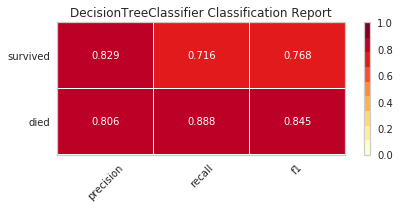

In [41]:
fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(dt, classes = ["died","survived"],
                             label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();

## ROC

A ROC curve illustrates how the classifier performs by tracking the true positive rate (recall/sensitivity) as the fase positive rate (inverted specificity) changes.

A rule of thumb is that the plot should bulge out toward the top-left corner. A plot that is to the left and above another plot indicates better performance. The diagonal in this plot indicates better performance. The diagonal in this plot indicates the behavior of a random guessing classifier. By taking the AUC, you get a metric for evaluating the performance:

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(y_test, y_predict)

0.8021845942519018

Yellowbrick can plot this for us:

In [44]:
from yellowbrick.classifier import ROCAUC

/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.8568919061707522

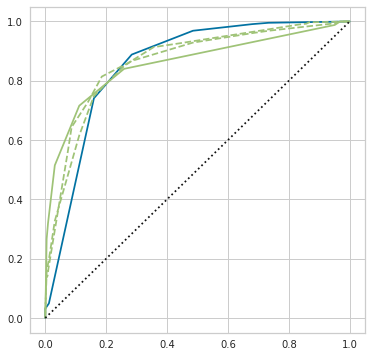

In [45]:
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(dt)
roc_viz.score(X_test, y_test)

## Precision-Recall Curve

The ROC curve may be overly optimistic for imbalanced classes. Another option for evaluating classifiers is using a precision-recall curve. Classification is a balancing act of finding everything you need (recall) while limiting the junk results (precision). This is typically a trade-off. As recall goes up, precision usually goes down and vice versa.

In [46]:
from sklearn.metrics import average_precision_score

In [47]:
average_precision_score(y_test, y_predict)

0.7155150490642249

In [48]:
from yellowbrick.classifier import PrecisionRecallCurve

0.8177126373723864


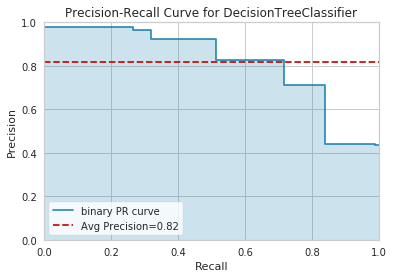

In [50]:
fig, ax = plt.subplots(figsize=(6,4))
viz = PrecisionRecallCurve(DecisionTreeClassifier(max_depth=3))
viz.fit(X_train, y_train)
print(viz.score(X_test, y_test))
viz.poof();

## Cumulative Gains Plot

A cumulative gains plot can be used to evaluate a binary classifier. It models the true positive rate (sensitivty) against the support rate (fraction of psotive prediction). The intuition behaind this plot is to sort all classifications by predicted probability. Ideally there would be a clean cut that divides positive from negative samples. If the first 10% of the predictions has 30% of the positive samples, you would plot a point from (0,0) to (.1, .3). You continue this process through all of the samples. 

A common use for this is determining customer response. The cumulative gains curve plots the support or predicted positive rate along the x-axis. Our chart labels this as "Percentage of sample." It plots the sensitivity or true positive rate along the y-axis. This is labeled as "Gain".

If you wanted to contact 90% of the customers that would respond (sensitivity), you can trace from .9 on the y-axis to the right until you hit that curve. The x-axis at the point will indicate how many total customers you need to contact (support) to get to 90%.

In this case we aren't contacting customers that would repond to a survey buy predicting survival on the Titanic. If we ordered all passengers on the Titanic according to our model by how likely they are to survive, if you took the first 65% of them, you would have 90% of the survivors. If you have an associated cost per contact and revenue per response, you can calculate what the best number is.

A model that is to the left and above another model is a better model. The best models are lines that go up to the top (if 10% of the samples are positive, it would hit at (.1, 1)) and then directly to the right. If the plot is below the baseline, we would do better to randomly assign labels that use our model. 

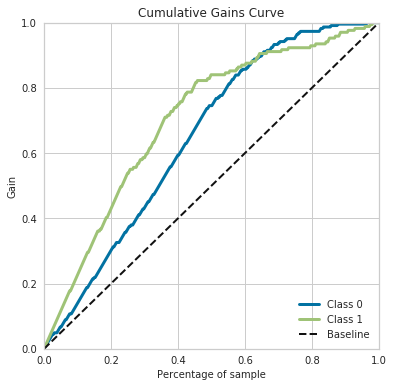

In [56]:
import scikitplot
fig, ax = plt.subplots(figsize=(6,6))
y_probas = dt.predict_proba(X_test)
scikitplot.metrics.plot_cumulative_gain(y_test, 
                                        y_probas, ax=ax);

## Lift Curve

A lift curve is another way of looking at the information in a cumulative gains plot. The lift is how much better we are doing than the baseline model. In our plot below, we can see that if we sorted our Titanic passengers by the survival probability and took the first 20% of them, our lift would be about 2.2 times (the gain divived by the sample percent) better than randomly choosing survivors. (We would get 2.2 times as many survivors).

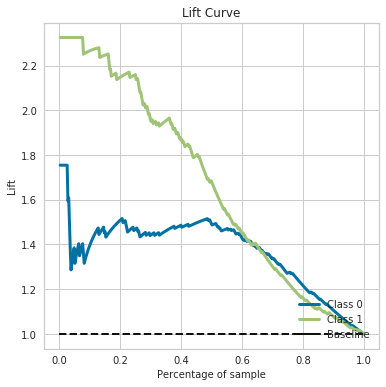

In [58]:
fig, ax = plt.subplots(figsize=(6,6))
scikitplot.metrics.plot_lift_curve(y_test, y_probas, ax=ax);

## Class Balance

Yellowbrick has a simple bar plot to view the class sizes. When the relative class sizes are different, accuracy is not a good evaluation metric. When splitting up the data into training and test sets, use *stratified sampling* so the sets keep a relative proportion of the classes. (The `test_train_split` function does this when you set the `stratify` parameter to the labels.)

In [59]:
from yellowbrick.classifier import ClassBalance

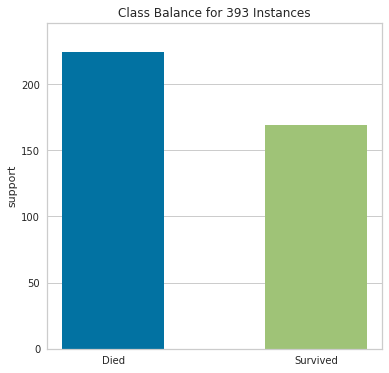

In [63]:
fig, ax = plt.subplots(figsize=(6,6))
cb_viz = ClassBalance(labels=["Died","Survived"])
cb_viz.fit(y_test)
cb_viz.poof();

## Class Predicton Error

The class prediction error plot is a bar chart that visualizes the confusion matrix:

In [64]:
from yellowbrick.classifier import ClassPredictionError

/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


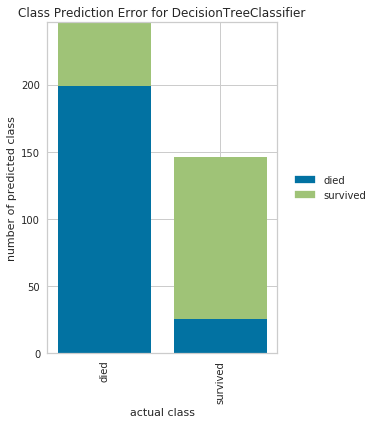

In [66]:
fig, ax = plt.subplots(figsize=(6,6))
cpe_viz = ClassPredictionError(dt, classes=["died","survived"])
cpe_viz.score(X_test, y_test)
cpe_viz.poof();

## Discrimination Threshold

Most binary classifiers that predict probability have a *discriminantion threshold* of 50%. If the predicted probability is above 50%, the classifier assigns a positive label. 

This plot can be useful to view the trade-of between precision and recall. Assume we are looking for fraud (and considering from to be the positive classification). To get high recall (catch all of the fraud), we can just classify everything as fraud. But in a bank situation, this would not be profitable and would require an army of workers. To get high precision (only catch fraud if it is fraud), we could have a model that only triggers on cases of extreme fraud. But this would miss much of the raud that might not be as obvious. 

The *queue rate* is the percent of predictions above the threshold. You can consider this to be the percent of cases to review if you are dealing with fraud. 

If you have the cost for positive, negative, and erroneous calculations, you can determine what threshold you are comfortable with.

The following plot is useful to see what discrimination threshold will maximize the f1 score or adjust precision or recall to an acceptable number when coupled with the queue rate. 

In [67]:
from yellowbrick.classifier import DiscriminationThreshold

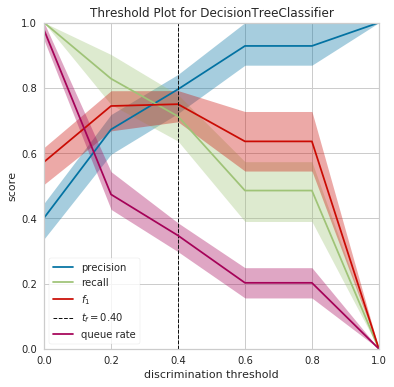

In [69]:
fig, ax = plt.subplots(figsize=(6,6))
dt_viz = DiscriminationThreshold(dt)
dt_viz.fit(X,y)
dt_viz.poof();